<a href="https://colab.research.google.com/github/ash-victor/Text-Mining-Teaching/blob/main/Text_preprocessing_EDA_Stress_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install nltk

In [ ]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 13.7 MB/s eta 0:00:00


In [ ]:
pip install pandas

In [ ]:
#%% Import python modules and packages

# Tools to create a data frame(table)
import pandas as pd
from pandas import DataFrame

# Tools for text preprocessing
import nltk
import re

# Tools to remove stopwords
from nltk.corpus import stopwords

# Tools for tokenizing
from nltk.tokenize.toktok import ToktokTokenizer

# Tools for lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

#Package to help us expand contractions
import contractions

# Tools for plotting
import matplotlib.pyplot as plt

# Tools for doing word frequencies
from nltk.util import ngrams

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#%% Read in a csv file

data = pd.read_csv("Stress.csv")

In [ ]:
print(data)

             subreddit post_id sentence_range  \
0                 ptsd  8601tu       (15, 20)   
1           assistance  8lbrx9         (0, 5)   
2                 ptsd  9ch1zh       (15, 20)   
3        relationships  7rorpp        [5, 10]   
4     survivorsofabuse  9p2gbc         [0, 5]   
...                ...     ...            ...   
2833     relationships  7oee1t       [35, 40]   
2834              ptsd  9p4ung       [20, 25]   
2835           anxiety  9nam6l        (5, 10)   
2836    almosthomeless  5y53ya        [5, 10]   
2837              ptsd  5y25cl         [0, 5]   

                                                   text  label  confidence  \
0     He said he had not felt that way before, sugge...      1    0.800000   
1     Hey there r/assistance, Not sure if this is th...      0    1.000000   
2     My mom then hit me with the newspaper and it s...      1    0.800000   
3     until i met my new boyfriend, he is amazing, h...      1    0.600000   
4     October is Dome

             subreddit post_id sentence_range  \
0                 ptsd  8601tu       (15, 20)   
1           assistance  8lbrx9         (0, 5)   
2                 ptsd  9ch1zh       (15, 20)   
3        relationships  7rorpp        [5, 10]   
4     survivorsofabuse  9p2gbc         [0, 5]   
...                ...     ...            ...   
2833     relationships  7oee1t       [35, 40]   
2834              ptsd  9p4ung       [20, 25]   
2835           anxiety  9nam6l        (5, 10)   
2836    almosthomeless  5y53ya        [5, 10]   
2837              ptsd  5y25cl         [0, 5]   

                                                   text  label  confidence  \
0     He said he had not felt that way before, sugge...      1    0.800000   
1     Hey there r/assistance, Not sure if this is th...      0    1.000000   
2     My mom then hit me with the newspaper and it s...      1    0.800000   
3     until i met my new boyfriend, he is amazing, h...      1    0.600000   
4     October is Dome

In [ ]:

#%% Drop any columns you don't want
# We will keep all the rows
# We will keep columns the first 5 columns
data = data.iloc[:,:5]

In [ ]:
#%% How does our new dataset look like?
print(data)

             subreddit post_id sentence_range  \
0                 ptsd  8601tu       (15, 20)   
1           assistance  8lbrx9         (0, 5)   
2                 ptsd  9ch1zh       (15, 20)   
3        relationships  7rorpp        [5, 10]   
4     survivorsofabuse  9p2gbc         [0, 5]   
...                ...     ...            ...   
2833     relationships  7oee1t       [35, 40]   
2834              ptsd  9p4ung       [20, 25]   
2835           anxiety  9nam6l        (5, 10)   
2836    almosthomeless  5y53ya        [5, 10]   
2837              ptsd  5y25cl         [0, 5]   

                                                   text  label  
0     He said he had not felt that way before, sugge...      1  
1     Hey there r/assistance, Not sure if this is th...      0  
2     My mom then hit me with the newspaper and it s...      1  
3     until i met my new boyfriend, he is amazing, h...      1  
4     October is Domestic Violence Awareness Month a...      1  
...                  

In [ ]:
#%% Defining a function to remove special characters
def remove_special_characters(text, remove_digits=False):
    '''
    A caret located in a bracket means ‘not.’
    If remove_digits parameter is True, "^a-zA-Z0-9\s" matches any characters other than
    alphabets ([a-zA-Z]) or digits ([0-9]), followed by a white space ([\s]).
    If 'remove_digits' parameter is False, the the function will remove numbers as well.
    '''
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [ ]:
#%% Defining a function to remove stopwords
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no') # we will not remove 'no' from texts
stopword_list.remove('not') # we will not reomve 'not' from texts

def remove_stopwords(text, is_lower_case=False):
    # First, tokenize the text
    tokens = tokenizer.tokenize(text)
    # remove whitespaces in each token
    tokens = [token.strip() for token in tokens]
    # if "is_lower_case" parameter is True,
    # we will not remove stopwords that have any upper case letter
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    # If "is_lower_case" parameter is False,
    # we will remove any stopwords no matter whether they are in uppercase or not
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text


In [ ]:
#%% Defining a function to perform stemming
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    # split the text into individual word and return a list of words
    # the 'ps' function stems each word, and .join() function joins the stemmed words with whitespace.
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text


In [ ]:
#%% Defining a function to perform lemmatization


wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    s = " " # create an empty string that later will contain lemmatized words,
    t_l = [] # create an empty list
    t_w = nltk.word_tokenize(text) # tokenize the text
    # assign the list of tokenized words into t_w.
    for w in t_w:
        # “pos” is a part of speech parameter and “v” means verbs.
        # We will lemmatize verbs only.
        l_w = wordnet_lemmatizer.lemmatize(w, pos="v")
        # append l_w into the list t_l
        t_l.append(l_w)
    # joint the tokens to make a complete sentence
    text = s.join(t_l)
    return text

In [ ]:
#%% This function takes all the previous preprocessing functions and combines them
def normalize_corpus(corpus, text_lower_case=True,
                     text_lemmatization=True, special_char_removal=True,
                     stopword_removal=True, remove_digits=True):

    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # lowercase the text
        if text_lower_case:
            doc = doc.lower()
        doc = contractions.fix(doc)  #Make contractions into full form
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits
        if special_char_removal:
            # insert spaces between special characters to isolate them
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        doc = re.sub('`', '', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)

        normalized_corpus.append(doc)

    return normalized_corpus

In [ ]:

#%% Normalize the text data and add a new column on the csv file of the preprocessed text
data['normalized_text'] = normalize_corpus(data['text'])

In [ ]:
#%% Let's see how our dataset looks like
print(data)


             subreddit post_id sentence_range  \
0                 ptsd  8601tu       (15, 20)   
1           assistance  8lbrx9         (0, 5)   
2                 ptsd  9ch1zh       (15, 20)   
3        relationships  7rorpp        [5, 10]   
4     survivorsofabuse  9p2gbc         [0, 5]   
...                ...     ...            ...   
2833     relationships  7oee1t       [35, 40]   
2834              ptsd  9p4ung       [20, 25]   
2835           anxiety  9nam6l        (5, 10)   
2836    almosthomeless  5y53ya        [5, 10]   
2837              ptsd  5y25cl         [0, 5]   

                                                   text  label  \
0     He said he had not felt that way before, sugge...      1   
1     Hey there r/assistance, Not sure if this is th...      0   
2     My mom then hit me with the newspaper and it s...      1   
3     until i met my new boyfriend, he is amazing, h...      1   
4     October is Domestic Violence Awareness Month a...      1   
...            

In [ ]:
#%% Save the new csv file
# Completed with the first step of Text Preprocessing
data.to_csv("Stress_preprocessed.csv")

In [ ]:
#%% Exploratory Data Analysis
# zero (0) means no stress, one (1) means stress
# we will group the subredits based on stress and no stress
# Enter the column name that we are interested grouping in

groups = data.groupby('label').agg({'label':'count'})
groups

,label
label,
0,1350
1,1488


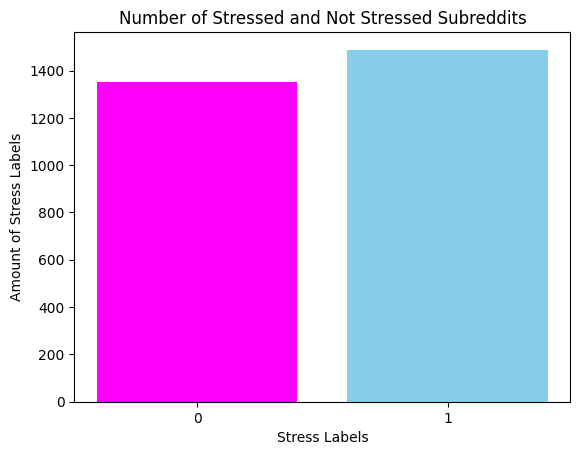

In [ ]:
#%% Creating a bar graph

bars = plt.bar(range(2),groups.label,color=('magenta','skyblue'))
# Add labels and title
plt.xlabel('Stress Labels')
plt.ylabel('Amount of Stress Labels')
plt.title('Number of Stressed and Not Stressed Subreddits')


plt.xticks([0,1])

plt.show()

In [ ]:
#%% Creating bigrams and calculating the word frequency
stressed_word=[]
for words in data[data.label == 1].normalized_text:
    tokens = tokenizer.tokenize(words)
    for token in tokens:
        stressed_word.append(token)
stressed_bigrams_series = (pd.Series(nltk.ngrams(stressed_word, 2)).value_counts())[:20]

Text(0.5, 0, '# of Occurances')

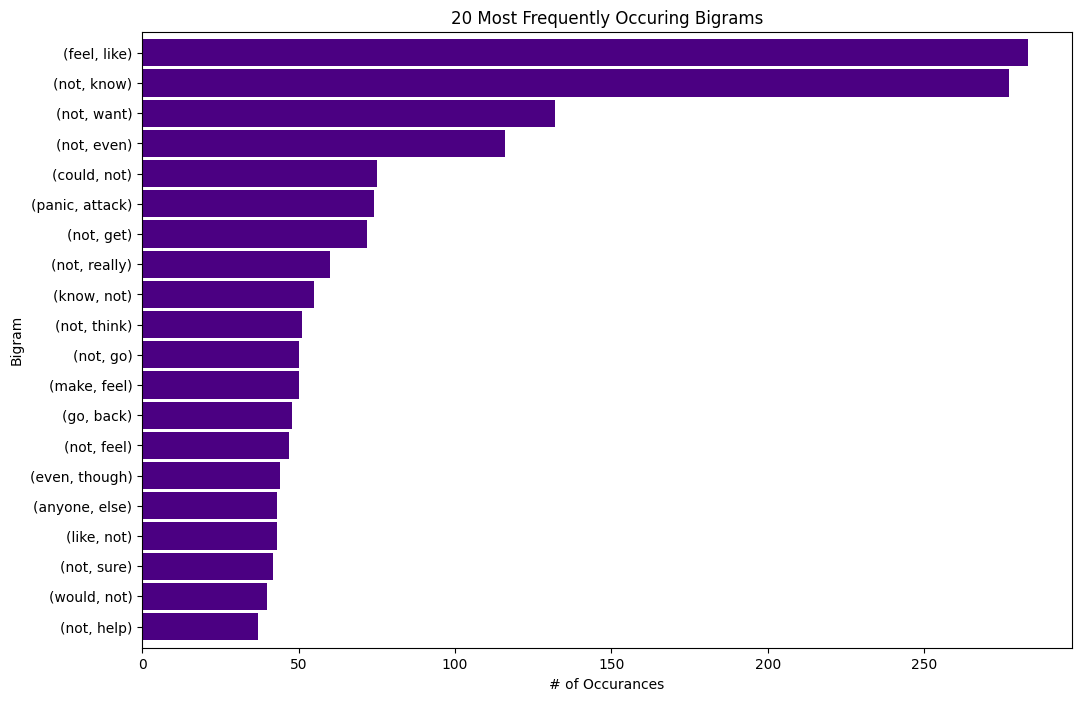

In [ ]:
#%% Creating a plot of the number of bigrams for all the stressed subredits
stressed_bigrams_series.sort_values().plot.barh(color='indigo', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')


Text(0.5, 0, '# of Occurances')

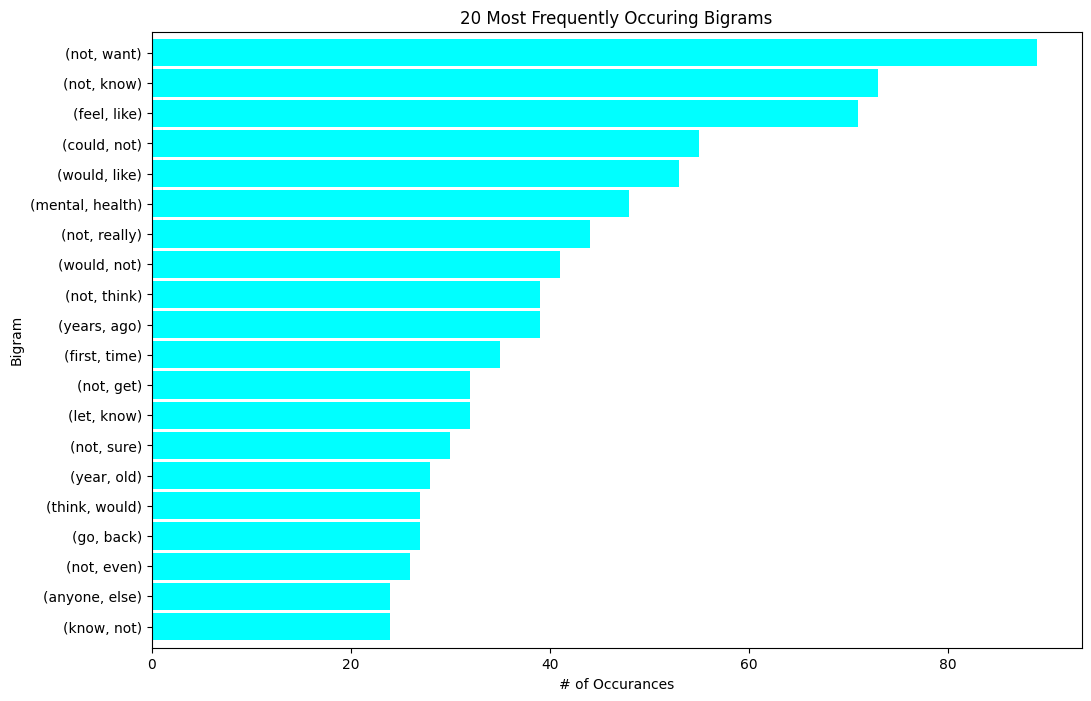

In [ ]:
#%% #%% Creating a plot of the number of bigrams for all the non-stressed subredits

non_stressed_word=[]
for words in data[data.label == 0].normalized_text:
    tokens = tokenizer.tokenize(words)
    for token in tokens:
        non_stressed_word.append(token)
non_stressed_bigrams_series = (pd.Series(nltk.ngrams(non_stressed_word, 2)).value_counts())[:20]
non_stressed_bigrams_series.sort_values().plot.barh(color='aqua', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')